In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2HhixeaZPxhWtmATiUvU")
project = rf.workspace("pyimagesearch").project("covid-19-pis")
version = project.version(1)
dataset = version.download("multiclass")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Covid-19-PIS-1 in multiclass:: 100%|██████████| 1287/1287 [00:00<00:00, 7628.25it/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Covid-19-PIS-1/train/_classes.csv")

In [ ]:
df.head()

,filename,with_mask,without_mask
0,36_jpg.rf.f8cae312e521642903aebba62287cdd4.jpg,0,1
1,27_jpg.rf.f9c1fe6dece8e2503e29dab3684d2edb.jpg,0,1
2,233_jpg.rf.f9ca0e89c624de3cf38df7c3b79c31ab.jpg,0,1
3,373_jpg.rf.f9f4e4c155c3e0092bab762f4667ce93.jpg,0,1
4,48-with-mask_jpg.rf.fa1f87003e141fea4aaa692988...,1,0


In [ ]:
import os
import shutil
import pandas as pd

# Define paths
train_folder = "Covid-19-PIS-1/valid"  # Change if needed
csv_file = os.path.join(train_folder, "_classes.csv")

# Read CSV and clean column names
df = pd.read_csv(csv_file)
df.columns = df.columns.str.strip()  # Remove extra spaces

print(df.columns)  # Debugging step to verify column names

# Ensure correct column names
if "filename" in df.columns and "with_mask" in df.columns:
    # Create target folders
    mask_folder = os.path.join(train_folder, "with_mask")
    no_mask_folder = os.path.join(train_folder, "without_mask")

    os.makedirs(mask_folder, exist_ok=True)
    os.makedirs(no_mask_folder, exist_ok=True)

    # Move images to respective folders
    for _, row in df.iterrows():
        image_name = row["filename"]
        mask_status = row["with_mask"]  # Adjusted column name

        # Define source and target paths
        src_path = os.path.join(train_folder, image_name)
        if mask_status == 1:  # Assuming 1 = with_mask, 0 = without_mask
            dest_path = os.path.join(mask_folder, image_name)
        else:
            dest_path = os.path.join(no_mask_folder, image_name)

        # Move the image if it exists
        if os.path.exists(src_path):
            shutil.move(src_path, dest_path)
        else:
            print(f"Image not found: {src_path}")

    print("Images sorted successfully!")
else:
    print("Column names not found! Check:", df.columns)


Index(['filename', 'with_mask', 'without_mask'], dtype='object')
Images sorted successfully!


In [75]:
import os
import shutil

# Define source and destination folders
test_mask_folder = "/content/Covid-19-PIS-1/valid/with_mask"
test_no_mask_folder = "/content/Covid-19-PIS-1/valid/without_mask"

train_mask_folder = "/content/Covid-19-PIS-1/train/with_mask"
train_no_mask_folder = "/content/Covid-19-PIS-1/train/without_mask"

# Create train folders if they don't exist
os.makedirs(train_mask_folder, exist_ok=True)
os.makedirs(train_no_mask_folder, exist_ok=True)

# Function to move files from test to train
def move_files(src_folder, dest_folder):
    if os.path.exists(src_folder):
        for file_name in os.listdir(src_folder):
            src_path = os.path.join(src_folder, file_name)
            dest_path = os.path.join(dest_folder, file_name)
            shutil.move(src_path, dest_path)
        print(f"Moved all files from {src_folder} to {dest_folder}.")
    else:
        print(f"Source folder {src_folder} does not exist.")

# Move with_mask images
move_files(test_mask_folder, train_mask_folder)

# Move without_mask images
move_files(test_no_mask_folder, train_no_mask_folder)

print("All test images moved to train folders successfully!")


Moved all files from /content/Covid-19-PIS-1/valid/with_mask to /content/Covid-19-PIS-1/train/with_mask.
Moved all files from /content/Covid-19-PIS-1/valid/without_mask to /content/Covid-19-PIS-1/train/without_mask.
All test images moved to train folders successfully!


In [77]:
import os

def count_images(folder_path):
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return 0

    image_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return image_count

# Example usage
folder_path = "/content/Covid-19-PIS-1/train/without_mask"  # Change to your folder path
num_images = count_images(folder_path)

print(f"Total images in '{folder_path}': {num_images}")


Total images in '/content/Covid-19-PIS-1/train/without_mask': 635


In [78]:
from keras.preprocessing import image
import cv2
import os

In [79]:
categories = ['with_mask','without_mask']

In [80]:
data = []
for category in categories:
  path = os.path.join('/content/Covid-19-PIS-1/train',category)

  label = categories.index(category)

  for file in os.listdir(path):
    image_path = os.path.join(path,file)
    img = cv2.imread(image_path)
    img = cv2.resize(img,(224,224))

    data.append([img,label])




In [81]:
len(data)

1279

In [82]:
import random
random.shuffle(data)

In [83]:
X=[]
y=[]

for freature , label in data:
  X.append(freature)
  y.append(label)

In [84]:
len(X),len(y)

(1279, 1279)

In [85]:
import numpy as np


In [86]:
X=np.array(X)
y=np.array(y)

In [87]:
np.set_printoptions(threshold=np.inf)  # Use np.nan for very large arrays if necessary

# Print the entire array
print(y)

[0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 

In [88]:
X.shape

(1279, 224, 224, 3)

In [89]:
X = X/255.0

In [90]:
X

KeyboardInterrupt: 

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [93]:
X_train.shape,X_test.shape

((1023, 224, 224, 3), (256, 224, 224, 3))

In [94]:
from keras.applications.vgg16 import VGG16

In [95]:
vgg = VGG16()

In [96]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [97]:
from keras import Sequential

In [98]:
model= Sequential()

In [99]:
for layer in vgg.layers[:-1]:
  model.add(layer)

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [101]:
for layer in model.layers:
  layer.trainable = False

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [103]:
from keras.layers import Dense
model.add(Dense(1,activation='sigmoid'))

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [105]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
!pip install tensorflow==2.15.0

In [107]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
32/32 [==============================] - 295s 9s/step - loss: 0.6425 - accuracy: 0.6471 - val_loss: 0.5174 - val_accuracy: 0.6992
Epoch 2/5
32/32 [==============================] - 287s 9s/step - loss: 0.3728 - accuracy: 0.8807 - val_loss: 0.3314 - val_accuracy: 0.9336
Epoch 3/5
32/32 [==============================] - 287s 9s/step - loss: 0.2806 - accuracy: 0.9218 - val_loss: 0.2689 - val_accuracy: 0.9258
Epoch 4/5
32/32 [==============================] - 287s 9s/step - loss: 0.2308 - accuracy: 0.9326 - val_loss: 0.2312 - val_accuracy: 0.9414
Epoch 5/5
32/32 [==============================] - 286s 9s/step - loss: 0.1989 - accuracy: 0.9365 - val_loss: 0.2015 - val_accuracy: 0.9453


In [108]:
model.save('/content/drive/MyDrive/Deep Learning/face_mask_detect.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
cap = cv2.VideoCapture(0)

In [39]:
from google.colab.patches import cv2_imshow
while True:
  ret, frame = cap.read()

  coords = detect_face(frame)
  for x,y,w,h in coords:
    print(x,y,w,h)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)

  #CALL DETECTION FN
  img = cv2.resize(frame,(224,224))
  y_pred = detect_face_mask(img)
  pred = (y_pred >= 0.5).astype(int)
  # print(pred)
  if y_pred == 0:
    draw_label(frame,'Mask Detected',(10,10),(0,255,0))
  else:
    draw_label(frame,'No Mask',(10,10),(0,0,255))

  cv2_imshow(frame)
  if(cv2.waitKey(1) & 0xFF == ord('x')):
    break
cv2.destroyAllWindows()

Failed to grab frame


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [122]:
def detect_face(img):
    coords = haar.detectMultiScale(img)
    print(coords)
    return coords

In [120]:
def detect_face_mask(img):
  y_pred = model.predict(img.reshape(1,224,224,3))
  return y_pred

In [121]:
def draw_label(img,text,pos,bg_color):
  text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
  end_x = pos[0] + text_size[0][0] + 2
  end_y = pos[1] + text_size[1][1] - 2

  cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
  cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)

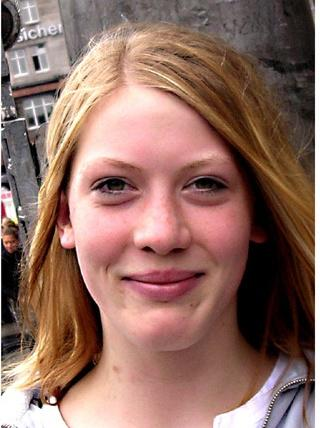

None
1/1 [==============================] - 1s 697ms/step


array([[1]])

In [119]:
path = '/content/Covid-19-PIS-1/train/without_mask/123_jpg.rf.27844bec1888977a351c8a32bd79630a.jpg'
sample = cv2.imread(path)
print(cv2_imshow(sample))
sample = cv2.resize(sample,(224,224))
pred = detect_face(sample)
(pred >= 0.5).astype(int)